***K MEANS CLUSTERING ON ATIS***

In [ ]:
pip freeze > requirements.txt 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
datas=pd.read_csv('atis_intents_train.csv')
datas

,atis_flight,i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
0,atis_flight,what flights are available from pittsburgh to...
1,atis_flight_time,what is the arrival time in san francisco for...
2,atis_airfare,cheapest airfare from tacoma to orlando
3,atis_airfare,round trip fares from pittsburgh to philadelp...
4,atis_flight,i need a flight tomorrow from columbus to min...
...,...,...
4838,atis_airfare,what is the two way fare from chennai to mumba...
4839,atis_airline,show me the list of airlines u have from dubai...
4840,atis_abbreviation,elucidate the expansion of aal
4841,atis_abbreviation,what is the abbreviation of abn


In [ ]:
datas.columns=['Intent','Sentence']
datas.head(10)

,Intent,Sentence
0,atis_flight,what flights are available from pittsburgh to...
1,atis_flight_time,what is the arrival time in san francisco for...
2,atis_airfare,cheapest airfare from tacoma to orlando
3,atis_airfare,round trip fares from pittsburgh to philadelp...
4,atis_flight,i need a flight tomorrow from columbus to min...
5,atis_aircraft,what kind of aircraft is used on a flight fro...
6,atis_flight,show me the flights from pittsburgh to los an...
7,atis_flight,all flights from boston to washington
8,atis_ground_service,what kind of ground transportation is availab...
9,atis_flight,show me the flights from dallas to san francisco


In [ ]:
x=datas['Intent'].unique().tolist()
print(x)
len(x)


['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft', 'atis_ground_service', 'atis_airline', 'atis_abbreviation', 'atis_quantity']


8

In [ ]:
len(datas)
datas.shape

(4843, 2)

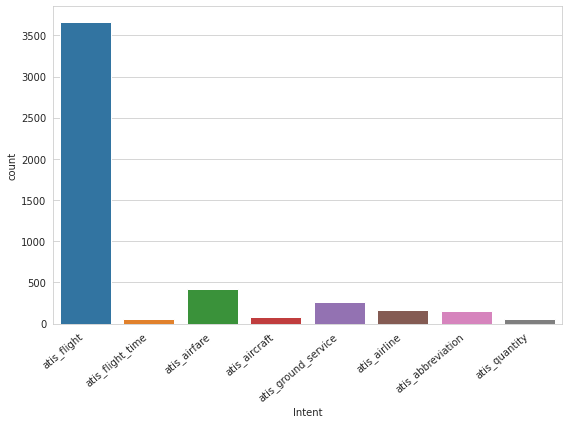

In [ ]:
import seaborn as sns


sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Intent', data=datas)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    
 
 
    text = text.lower() 


    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    

    text = text.replace('x', '') 
    

    text = REMOVE_NUM.sub('', text)

    text = BAD_SYMBOLS_RE.sub('', text) 


    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    
 
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

 
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
datas["Sentence"] = datas["Sentence"].apply(clean_text)
#datas.head(20)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_train_vc = vectorizer.fit_transform(datas["Sentence"])

pd.DataFrame(X_train_vc.toarray(), columns=vectorizer.get_feature_names()).head()

,abbrevi,afternoon,afternoon arriv,afternoon flight,air,air flight,aircraft,aircraft use,airfar,airlin,airlin boston,airlin class,airlin fli,airlin flight,airlin leav,airport,airport downtown,american,american airlin,american flight,angel,angel pittsburgh,ap,april,arrang,arrang round,arriv,arriv atlanta,arriv baltimor,arriv boston,arriv chicago,arriv dalla,arriv denver,arriv noon,arriv oclock,arriv philadelphia,arriv pittsburgh,arriv pm,arriv san,atlanta,...,twa,twa flight,twelfth,twenti,twenti fifth,twenti ninth,twenti seventh,twentieth,type,type aircraft,ua,unit,unit airlin,unit flight,use,use flight,vega,vega new,want,want fli,want flight,washington,washington boston,washington dc,washington denver,washington san,way,way fare,way flight,wednesday,wednesday morn,wednesday thursday,week,weekday,westchest,westchest counti,worth,york,york citi,york miami
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


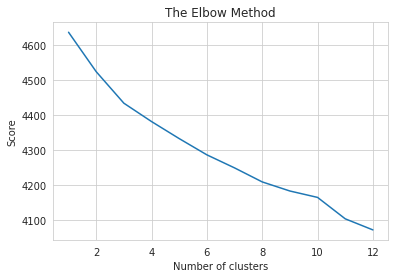

In [ ]:
k_clusters =12
from sklearn.cluster import KMeans

score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_train_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
#plt.savefig('elbow2.png')
plt.show()

In [ ]:
k_clusters =8

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_train_vc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=1e-06, verbose=0)

In [ ]:
clusters = model.predict(X_train_vc)

In [ ]:
datas["Cluster Label"] = clusters
datas.head(20)

,Intent,Sentence,Cluster Label
0,atis_flight,flight avail pittsburgh baltimor thursday morn,3
1,atis_flight_time,arriv time san francisco flight leav washington,4
2,atis_airfare,cheapest airfar tacoma orlando,1
3,atis_airfare,round trip fare pittsburgh philadelphia dollar,5
4,atis_flight,need flight tomorrow columbu minneapoli,1
5,atis_aircraft,kind aircraft use flight cleveland dalla,1
6,atis_flight,show flight pittsburgh lo angel thursday,3
7,atis_flight,flight boston washington,7
8,atis_ground_service,kind ground transport avail denver,2
9,atis_flight,show flight dalla san francisco,4


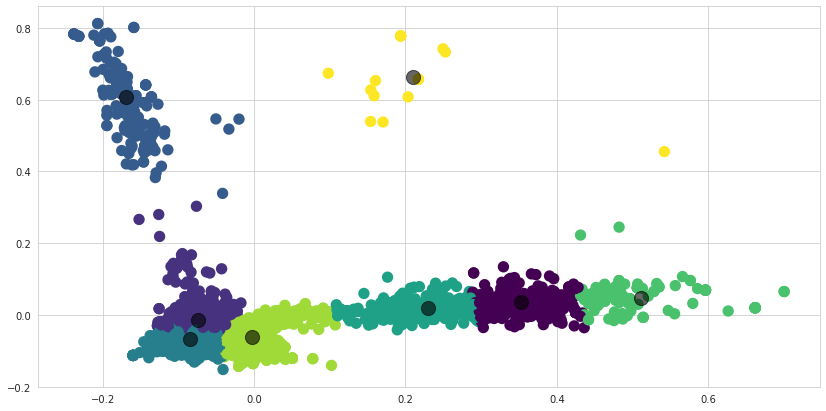

In [ ]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train_vc.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(14, 7))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [ ]:
# Just print it to the screen
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster ",i,":")
    print()
    print("****************")
    print()
    for ele in top_ten_words:
      print(ele)
      #print()
    print()

Cluster  0 :

****************

airlin
american airlin
american
airlin flight
fli
flight
unit airlin
airlin fli

Cluster  1 :

****************

flight
leav
dalla
fare
list
philadelphia
citi
arriv

Cluster  2 :

****************

transport
ground transport
ground
transport avail
airport
avail
downtown
transport denver

Cluster  3 :

****************

baltimor
flight pittsburgh
pittsburgh
flight baltimor
flight
dalla
pittsburgh baltimor
dalla baltimor

Cluster  4 :

****************

francisco
san francisco
san
flight
flight san
boston san
boston
denver san

Cluster  5 :

****************

round trip
round
trip
trip fare
trip flight
fare
dollar
cheapest round

Cluster  6 :

****************

denver
flight denver
like
id
id like
flight
denver philadelphia
denver pittsburgh

Cluster  7 :

****************

boston
flight boston
atlanta
flight atlanta
flight
boston atlanta
boston denver
washington



***PREDICTION WITH TEST DATA***

In [ ]:
dfs=pd.read_csv('atis_intents_test.csv')
dfs.columns=['Intent','Sentence']
dfs.head(10)

,Intent,Sentence
0,atis_airfare,on april first i need a ticket from tacoma to...
1,atis_flight,on april first i need a flight going from pho...
2,atis_flight,i would like a flight traveling one way from ...
3,atis_flight,i would like a flight from orlando to salt la...
4,atis_flight,i need a flight from toronto to newark one wa...
5,atis_flight,monday morning i would like to fly from colum...
6,atis_flight,on wednesday april sixth i would like to fly ...
7,atis_flight,after 12 pm on wednesday april sixth i would ...
8,atis_flight,are there any flights from long beach to colu...
9,atis_flight,find a flight from memphis to tacoma dinner


In [ ]:
dfs['Sentence']=dfs['Sentence'].apply(clean_text)
dfs.head(10)

,Intent,Sentence
0,atis_airfare,april first need ticket tacoma san jose depart
1,atis_flight,april first need flight go phoeni san diego
2,atis_flight,would like flight travel one way phoeni san di...
3,atis_flight,would like flight orlando salt lake citi april...
4,atis_flight,need flight toronto newark one way leav wednes...
5,atis_flight,monday morn would like fli columbu indianapoli
6,atis_flight,wednesday april sith would like fli long beach...
7,atis_flight,pm wednesday april sith would like fli long be...
8,atis_flight,flight long beach columbu wednesday april sith
9,atis_flight,find flight memphi tacoma dinner


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_test_vec= vectorizer.fit_transform(dfs["Sentence"])

pd.DataFrame(X_test_vec.toarray(), columns=vectorizer.get_feature_names()).head()

,afternoon,air,aircraft,airlin,airlin fli,airlin flight,airport,american,american airlin,angel,april,arriv,arriv pm,atlanta,avail,baltimor,boston,burbank,california,charlott,cheapest,chicago,cincinnati,citi,class,cleveland,code,columbu,counti,daili,dalla,dc,delta,denver,depart,detroit,diego,earli,fare,fare code,...,pm,round,round trip,salt,salt lake,san,san diego,san francisco,san jose,saturday,saturday morn,seattl,sith,st,st loui,st paul,st petersburg,sunday,tacoma,tampa,thursday,toronto,transport,transport avail,travel,trip,trip flight,tuesday,twenti,type,vega,want,washington,washington dc,way,wednesday,westchest,westchest counti,york,york citi
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.400359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.393021,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.285319,0.000000,0.0,0.408365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417174,0.0,0.000000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.393474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.347799,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.280412,0.347799,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.363634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.321423,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.259146,0.321423,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.40924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356968,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.233845,0.0,0.0,0.0,0.0,0.0,0.0,0.323324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.340746,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.277219,0.277219,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.371832,0.30625,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.342273,0.290696,0.0,0.0,0.0,0.0


In [ ]:
model.fit(X_test_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=1e-06, verbose=0)

In [ ]:
clusters1 = model.predict(X_test_vec)

In [ ]:
dfs["Cluster Label"] = clusters1
dfs.head(20)

,Intent,Sentence,Cluster Label
0,atis_airfare,april first need ticket tacoma san jose depart,4
1,atis_flight,april first need flight go phoeni san diego,4
2,atis_flight,would like flight travel one way phoeni san di...,4
3,atis_flight,would like flight orlando salt lake citi april...,5
4,atis_flight,need flight toronto newark one way leav wednes...,0
5,atis_flight,monday morn would like fli columbu indianapoli,0
6,atis_flight,wednesday april sith would like fli long beach...,0
7,atis_flight,pm wednesday april sith would like fli long be...,0
8,atis_flight,flight long beach columbu wednesday april sith,0
9,atis_flight,find flight memphi tacoma dinner,0


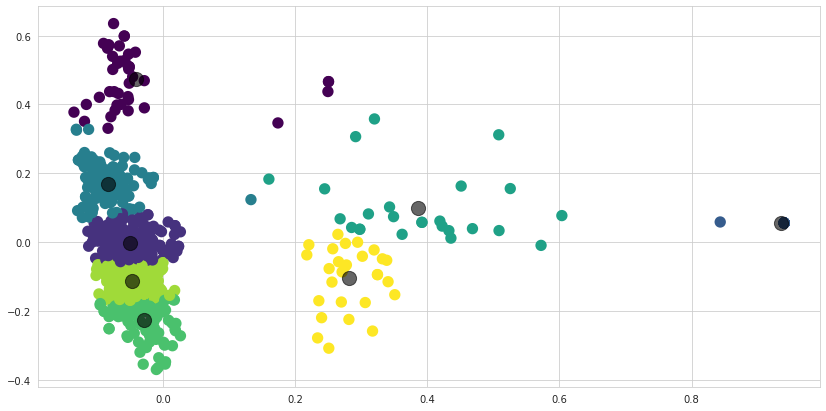

In [ ]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_test_vec.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(14, 7))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster ",i,":")
    print()
    print("****************")
    print()
    for ele in top_ten_words:
      print(ele)
      #print()
    print()

Cluster  0 :

****************

flight
milwauke
list
list flight
st
orlando
pm
morn

Cluster  1 :

****************

kansa citi
kansa
citi
flight kansa
chicago
flight
pleas
pleas flight

Cluster  2 :

****************

airlin
airlin flight
burbank
flight
list
denver
aircraft
flight burbank

Cluster  3 :

****************

washington
washington dc
dc
fare
fare code
flight washington
code
mean

Cluster  4 :

****************

san
diego
san diego
san francisco
francisco
flight san
jose
san jose

Cluster  5 :

****************

lake
salt lake
salt
lake citi
citi
oakland
oakland salt
flight oakland

Cluster  6 :

****************

trip
round
round trip
vega
la vega
la
new
new york

Cluster  7 :

****************

transport
ground
ground transport
westchest counti
counti
westchest
airport
transport avail

